In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data = pd.read_csv(r"../data/SeoulBikeData_cleaned_cols.csv")


data.head()


,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_rad,rainfall,snowfall,seasons,holiday,functioning_day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [145]:
data["date"] = pd.to_datetime(data["date"], dayfirst=True) # dayfirst=True is used to specify the date format
 
# Extract day, month, and year
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year

data.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_rad,rainfall,snowfall,seasons,holiday,functioning_day,day,month,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [146]:
avg_hourly_rentals = data.groupby('hour').agg(avg_rented_bike_count = ('rented_bike_count', 'mean'))
avg_hourly_rentals

,avg_rented_bike_count
hour,
0,541.460274
1,426.183562
2,301.630137
3,203.331507
4,132.591781
5,139.082192
6,287.564384
7,606.005479
8,1015.701370


In [149]:
temp_data = data.groupby('month').agg(avg_temperature = ('temp', 'mean'))
temp_data

,avg_temperature
month,
1,-3.943145
2,-1.664732
3,8.044489
4,12.948056
5,18.144355
6,23.136806
7,27.763978
8,28.736425
9,21.498750


In [151]:

data["year_month"] = data["date"].dt.strftime('%Y-%m')
data.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_rad,rainfall,snowfall,seasons,holiday,functioning_day,day,month,year,year_month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,2017-12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,2017-12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,2017-12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,2017-12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,2017-12


In [154]:
temp_data = data.groupby('year_month').agg(avg_temperature = ('temp', 'mean'))
temp_data

,avg_temperature,ave_humidity
year_month,,
2017-12,-1.928763,55.825269
2018-01,-3.943145,48.081989
2018-02,-1.664732,44.854167
2018-03,8.044489,59.295699
2018-04,12.948056,54.611111
2018-05,18.144355,62.288978
2018-06,23.136806,62.618056
2018-07,27.763978,67.447581
2018-08,28.736425,64.802419


<Axes: ylabel='year_month'>

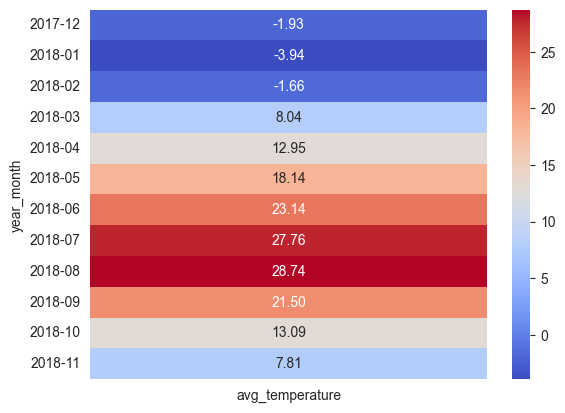

In [153]:
sns.heatmap(temp_data, annot=True, fmt=".2f", cmap='coolwarm')